Reading file ../../case-6/results_ensemble/sample_15/22/U
Reading file ../../case-6/results_ensemble/sample_15/22/theta1_Scaled
Reading file ../../case-6/results_ensemble/sample_15/22/theta2_Scaled
Reading file ../../case-6/results_ensemble/sample_15/22/ratio_Viscosity_Scaled
Reading file ../../case-6/results_ensemble/sample_15/22/ratio_Product_Scaled
Reading file ../../case-6/results_ensemble/sample_15/22/ratio_RAll2RNormal_Scaled
Reading file ../../case-6/results_ensemble/sample_15/22/g1
Reading file ../../case-6/results_ensemble/sample_15/constant/polyMesh/owner
Reading file ../../case-6/results_ensemble/sample_15/constant/polyMesh/faces
Reading file ../../case-6/results_ensemble/sample_15/constant/polyMesh/points
Reading file ../../case-6/results_ensemble/sample_15/constant/polyMesh/neighbour
NN g1 min max -0.121739 -0.106139
SR g1 min max -0.1219415045252324 -0.10589857360688001
error mean min max 1.604384e-02, 9.578878e-07, 1.097888e-01


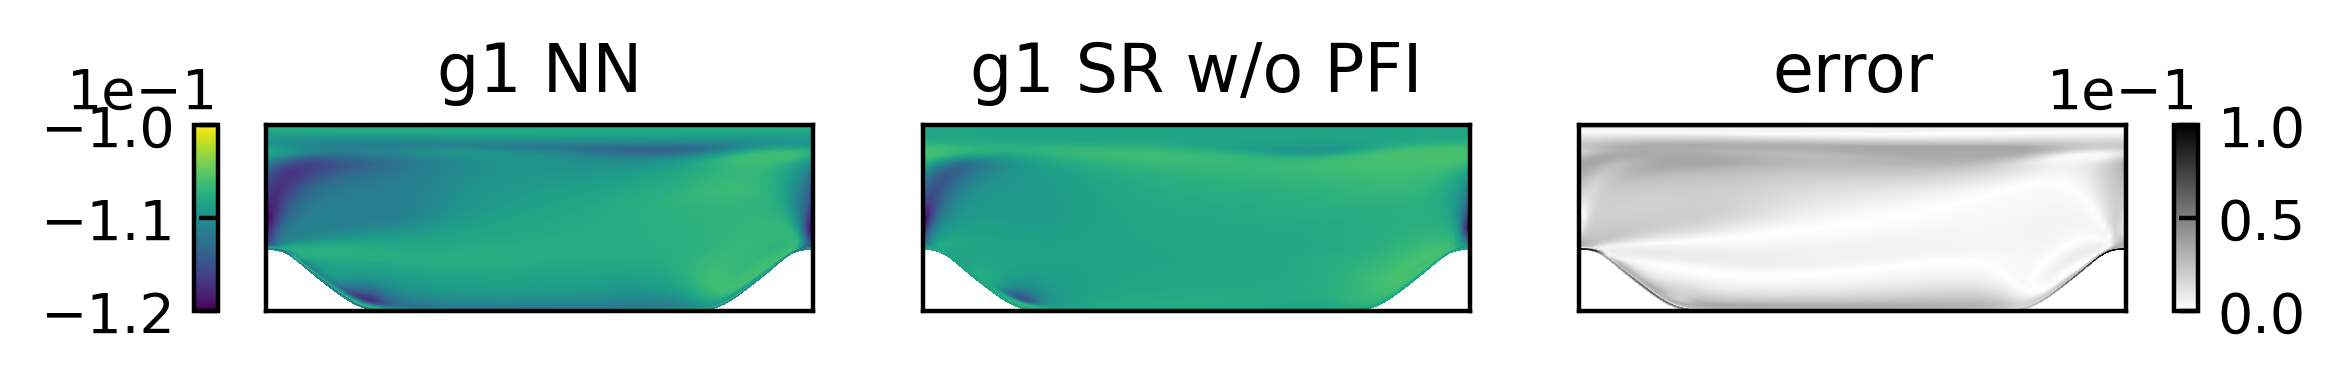

In [1]:
# check SR regression misfit
import numpy as np
import os
import fluidfoam as ff
import matplotlib.pyplot as plt
# case specification
dafiCase = '../../case-6/'
sampleId = 15
timeDir = 22
#############################################################################
# load data

Nx = 99
Ny = 149

foamCase = os.path.join(dafiCase, 'results_ensemble', f'sample_{sampleId}')
U = ff.readvector(foamCase, f'{timeDir:g}', 'U')
q1 = ff.readscalar(foamCase, f'{timeDir:g}', 'theta1_Scaled')
q2 = ff.readscalar(foamCase, f'{timeDir:g}', 'theta2_Scaled')
q3 = ff.readscalar(foamCase, f'{timeDir:g}', 'ratio_Viscosity_Scaled')
q4 = ff.readscalar(foamCase, f'{timeDir:g}', 'ratio_Product_Scaled')
q5 = ff.readscalar(foamCase, f'{timeDir:g}', 'ratio_RAll2RNormal_Scaled')
g1 = ff.readscalar(foamCase, f'{timeDir:g}', 'g1')
x, y, z = ff.readmesh(foamCase)

x_mesh = np.reshape(x, (Ny, Nx))
y_mesh = np.reshape(y, (Ny, Nx))
g1_mesh = np.reshape(g1, (Ny, Nx))
q1_mesh = np.reshape(q1, (Ny, Nx))
q2_mesh = np.reshape(q2, (Ny, Nx))
q3_mesh = np.reshape(q3, (Ny, Nx))
q4_mesh = np.reshape(q4, (Ny, Nx))
q5_mesh = np.reshape(q5, (Ny, Nx))


def g1_SR_func(q1, q2, q3, q4, q5):
    # f1 = -11.351219045693 + np.sin(q4 + q2 + q1)
    # f2 = -11.265279714781 + np.arctan(q2 + q1 * (q4 + 1))
    # f3 = -7.928435493918 + q2 - np.pi * np.cos(q1)
    # f4 = -12.329097219426 + q2 + np.exp(q1)
    # f5 = -11.703936411632 + np.cos(np.cos(2*q4))
    # f6 = -10.374133077627 + np.sin(q4 - 1)
    # f7 = -11.305966165402 + np.arctan(q4)
    # f8 = -9.311597846099 + np.log(np.abs(np.log(q5)))
    # f9 = -11.333439000000 + q4
    # f10 = -11.120918611776 + q4 * q4
    # f11 = -11.368979000000 + q4 + q2 + q1
    # f12 = -10.385722000000 + q4 + q2 + q1 - q3
    # f13 = -50.000041853510 * (1 / q1 - 1) / (1 / q4 - 1)

    # f14 = (0.386986 + 1 / np.sqrt(-1 + np.pi - q4 / q2)) * np.log(
    #     0.0000167184 / np.abs(1 + np.log(q3)))

    # f15 = (1.36853 + 1 / (-1 +
    #                       (-1 + (q2 - np.cos(q4)) /
    #                        (1 + np.log(1 + q4))) / np.sqrt(1 + q1))) * np.log(
    #                            0.0000167184 / np.abs(1 + np.log(q3)))

    # f16 = (1.00007 + np.arctan(0.368453 + 1 /
    #                            (-1 + (-1 + (q2 - np.cos(q4)) /
    #                                   (1 + np.log(1 + q4))) / np.sqrt(1 + q1)))
    #        ) * np.log(0.0000167184 / np.abs(1 + np.log(q3)))
    # f17 = (0.368453 + 0.332444 * (np.pi - 1 / (2 * np.pi + q5)) + 1 /
    #        (-1 + (-1 + (q2 - np.cos(q4)) /
    #               (1 + np.log(1 + q4))) / np.sqrt(1 + q1))) * np.log(
    #                   0.0000167184 / np.abs(1 + np.log(q3)))
    # f18 = (0.368453 + 0.325915 * (np.pi - 1 / (np.pi * (np.pi + q5))) + 1 /
    #        (-1 + (-1 + (q2 - np.cos(q4)) /
    #               (1 + np.log(1 + q4))) / np.sqrt(1 + q1))) * np.log(
    #                   0.0000167184 / np.abs(1 + np.log(q3)))
    # f19 = np.log(0.0000167184 / np.abs(1 + np.log(q3))) * (
    #     0.341838 * (np.pi - 1 / (np.pi + np.sqrt(1 + q5))) +
    #     np.sin(0.368453 + 1 / (-1 + (-1 + (q2 - np.cos(q4)) /
    #                                  (1 + np.log(1 + q4))) / np.sqrt(1 + q1))))
    # f20 = (0.341838 * (np.pi - 1 / (np.pi + np.sqrt(1 + q5))) +
    #        np.arctan(0.368453 + 1 /
    #                  (-1 +
    #                   (-1 + (q2 - np.cos(q4)) /
    #                    (1 + np.log(1 + q4))) / np.sqrt(1 + q1)))) * np.log(
    #                        0.0000167184 / np.abs(1 + np.log(q3)))

    F1 = -10.836 + (q1 + q2) * (q3 - q1 - q2)

    return F1 * 1.e-2


g1_SR = g1_SR_func(q1_mesh, q2_mesh, q3_mesh, q4_mesh, q5_mesh)
error = np.abs(g1_SR - g1_mesh) / np.max(np.abs(g1_mesh))

print('NN g1 min max', g1_mesh.min(), g1_mesh.max())
print('SR g1 min max', g1_SR.min(), g1_SR.max())
print(
    f'error mean min max {error.mean():.6e}, {error.min():.6e}, {error.max():.6e}'
)
# check error
levels_g1 = np.linspace(-0.12, -0.1, 512)
levels_er = np.linspace(0, 0.1, 512)
fig, ax = plt.subplots(1, 3, figsize=(6, 3), dpi=400)
a0 = ax[0].contourf(x_mesh, y_mesh, g1_mesh, levels=levels_g1)
a1 = ax[1].contourf(x_mesh, y_mesh, g1_SR, levels=levels_g1)
a2 = ax[2].contourf(x_mesh, y_mesh, error, cmap='gray_r', levels=levels_er)

for i in range(3):
    ax[i].set(aspect='equal', xticks=([]), yticks=([]))
ax[0].set(title='g1 NN')
ax[1].set(title='g1 SR w/o PFI')
ax[2].set(title='error')

pos_a0 = ax[0].get_position()
cb0_ax = fig.add_axes(
    [pos_a0.x0 - 0.03, pos_a0.y0, 0.01, pos_a0.y1 - pos_a0.y0])
cb0 = plt.colorbar(a0, cax=cb0_ax, orientation='vertical')
cb0.ax.set_yticks([-0.12, -0.11, -0.10])
cb0.ax.ticklabel_format(style='sci', scilimits=(0, 0))
cb0.ax.tick_params(axis='y',
                   direction='in',
                   bottom=False,
                   top=False,
                   labelright=False,
                   labelleft=True,
                   labelbottom=False,
                   labeltop=False)

pos_a2 = ax[2].get_position()
cb2_ax = fig.add_axes(
    [pos_a2.x1 + 0.02, pos_a2.y0, 0.01, pos_a2.y1 - pos_a2.y0])
cb2 = plt.colorbar(a2, cax=cb2_ax, orientation='vertical')
cb2.ax.set_yticks([0, 0.05, 0.1])
cb2.ax.ticklabel_format(style='sci', scilimits=(0, 0))
cb2.ax.tick_params(
    axis='y',
    direction='in',
    #    bottom=False,
    #    top=False,
    labelright=True,
    labelleft=False,
    labelbottom=False,
    labeltop=False)
# cb0.ax.set_ylabel(r'$g^{(1)}$', rotation='horizontal', labelpad=8.0)

Reading file ../../case-6/results_ensemble/sample_15/22/U
Reading file ../../case-6/results_ensemble/sample_15/22/theta1_Scaled
Reading file ../../case-6/results_ensemble/sample_15/22/theta2_Scaled
Reading file ../../case-6/results_ensemble/sample_15/22/ratio_Viscosity_Scaled
Reading file ../../case-6/results_ensemble/sample_15/22/ratio_Product_Scaled
Reading file ../../case-6/results_ensemble/sample_15/22/ratio_RAll2RNormal_Scaled
Reading file ../../case-6/results_ensemble/sample_15/22/g1
Reading file ../../case-6/results_ensemble/sample_15/constant/polyMesh/owner
Reading file ../../case-6/results_ensemble/sample_15/constant/polyMesh/faces
Reading file ../../case-6/results_ensemble/sample_15/constant/polyMesh/points
Reading file ../../case-6/results_ensemble/sample_15/constant/polyMesh/neighbour
NN g1 min max -0.121739 -0.106139
SR g1 min max -0.11709339970338943 -0.10139817295618223
error mean min max 1.539949e-02, 1.162014e-06, 1.077599e-01


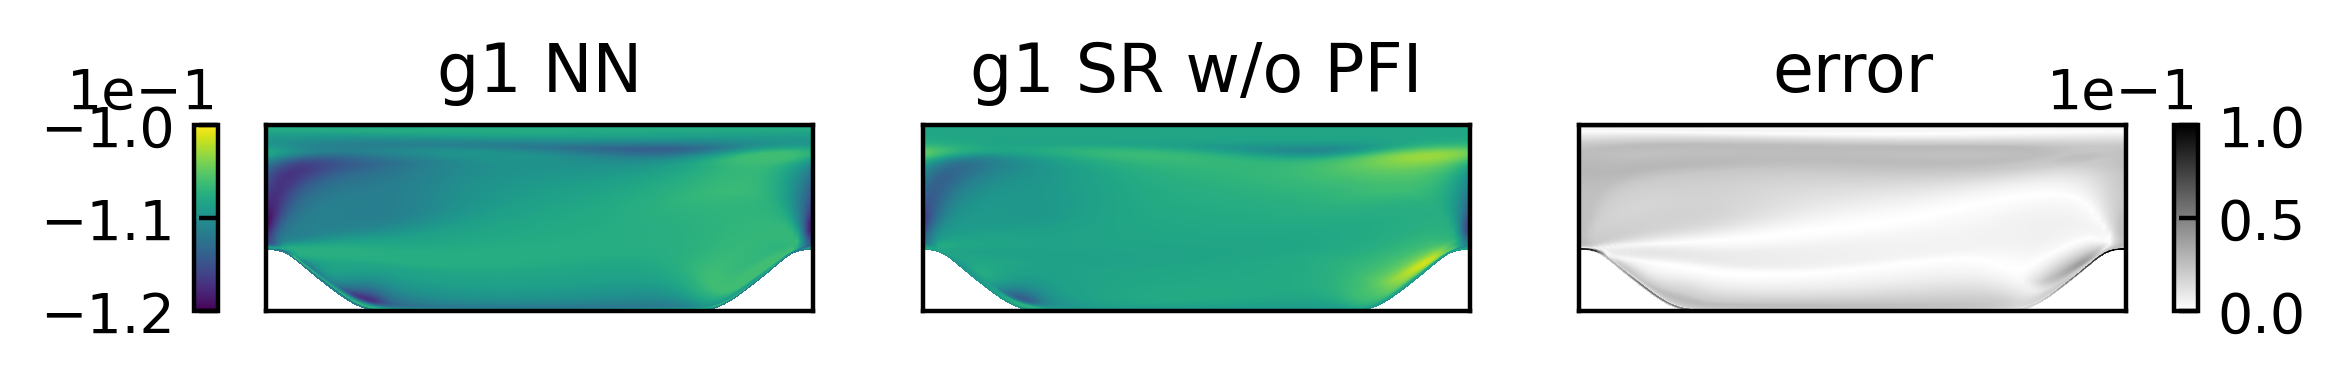

In [11]:
import numpy as np


def g1_1(x0, x1, x2, x3, x4):
    f = -10.970625598135 + (x1 + (x0 * (np.pi - (x2 + 1))))
    return f / 1.e2


def g1_2(x0, x1, x2, x3, x4):
    f = -10.950191923985 + (x0 + (x1 / (np.pi - (x2 + 1))))
    return f / 1.e2


def g1_3(x0, x1, x2, x3, x4):
    f = -11.133998614875 + x0 + (x2 - (x1 + np.cos(x1))) / (x0 - 3)
    return f / 1.e2


def g1_4(x0, x1, x2, x3, x4):
    f = -10.838525366416 + ((x0 + x1) * (x2 - (x0 + x1)))
    return f / 1.e2


def g1_5(x0, x1, x2, x3, x4):
    f = -10.260249148038 + ((x2 - np.exp(((x0 + x1) + 1))))**(-1)
    return f / 1.e2


def g1_6(x0, x1, x2, x3, x4):
    f = -10.829363987473 + ((x0 + x1) - np.abs(((x0 + x1) / np.pi)))
    return f / 1.e2


def g1_7(x0, x1, x2, x3, x4):
    f = -9.412858386671 + ((x0 + x1) - np.sqrt(((np.abs((x0 + x1)) + 1) + 1)))
    return f / 1.e2


def g1_8(x0, x1, x2, x3, x4):
    f = -10.833901618225 + ((x0 + x1) * ((np.log(np.pi))**(-1) - (x0 + x1)))
    return f / 1.e2


def g1_9(x0, x1, x2, x3, x4):
    f = -7.931719050263 + (x1 - (np.pi / np.sqrt(np.exp(x0))))
    return f / 1.e2


def g1_10(x0, x1, x2, x3, x4):
    f = -10.939871946083 + (x1 + np.sin((x0 / np.cos(x0))))
    return f / 1.e2

    # check SR regression misfit


import numpy as np
import os
import fluidfoam as ff
import matplotlib.pyplot as plt
# case specification
dafiCase = '../../case-6/'
sampleId = 15
timeDir = 22
#############################################################################
# load data

Nx = 99
Ny = 149

foamCase = os.path.join(dafiCase, 'results_ensemble', f'sample_{sampleId}')
U = ff.readvector(foamCase, f'{timeDir:g}', 'U')
q1 = ff.readscalar(foamCase, f'{timeDir:g}', 'theta1_Scaled')
q2 = ff.readscalar(foamCase, f'{timeDir:g}', 'theta2_Scaled')
q3 = ff.readscalar(foamCase, f'{timeDir:g}', 'ratio_Viscosity_Scaled')
q4 = ff.readscalar(foamCase, f'{timeDir:g}', 'ratio_Product_Scaled')
q5 = ff.readscalar(foamCase, f'{timeDir:g}', 'ratio_RAll2RNormal_Scaled')
g1 = ff.readscalar(foamCase, f'{timeDir:g}', 'g1')
x, y, z = ff.readmesh(foamCase)

x_mesh = np.reshape(x, (Ny, Nx))
y_mesh = np.reshape(y, (Ny, Nx))
g1_mesh = np.reshape(g1, (Ny, Nx))
q1_mesh = np.reshape(q1, (Ny, Nx))
q2_mesh = np.reshape(q2, (Ny, Nx))
q3_mesh = np.reshape(q3, (Ny, Nx))
q4_mesh = np.reshape(q4, (Ny, Nx))
q5_mesh = np.reshape(q5, (Ny, Nx))

g1_SR = g1_10(q1_mesh, q2_mesh, q3_mesh, q4_mesh, q5_mesh)
error = np.abs(g1_SR - g1_mesh) / np.max(np.abs(g1_mesh))

print('NN g1 min max', g1_mesh.min(), g1_mesh.max())
print('SR g1 min max', g1_SR.min(), g1_SR.max())
print(
    f'error mean min max {error.mean():.6e}, {error.min():.6e}, {error.max():.6e}'
)
# check error
levels_g1 = np.linspace(-0.12, -0.1, 512)
levels_er = np.linspace(0, 0.1, 512)
fig, ax = plt.subplots(1, 3, figsize=(6, 3), dpi=400)
a0 = ax[0].contourf(x_mesh, y_mesh, g1_mesh, levels=levels_g1)
a1 = ax[1].contourf(x_mesh, y_mesh, g1_SR, levels=levels_g1)
a2 = ax[2].contourf(x_mesh, y_mesh, error, cmap='gray_r', levels=levels_er)

for i in range(3):
    ax[i].set(aspect='equal', xticks=([]), yticks=([]))
ax[0].set(title='g1 NN')
ax[1].set(title='g1 SR w/o PFI')
ax[2].set(title='error')

pos_a0 = ax[0].get_position()
cb0_ax = fig.add_axes(
    [pos_a0.x0 - 0.03, pos_a0.y0, 0.01, pos_a0.y1 - pos_a0.y0])
cb0 = plt.colorbar(a0, cax=cb0_ax, orientation='vertical')
cb0.ax.set_yticks([-0.12, -0.11, -0.10])
cb0.ax.ticklabel_format(style='sci', scilimits=(0, 0))
cb0.ax.tick_params(axis='y',
                   direction='in',
                   bottom=False,
                   top=False,
                   labelright=False,
                   labelleft=True,
                   labelbottom=False,
                   labeltop=False)

pos_a2 = ax[2].get_position()
cb2_ax = fig.add_axes(
    [pos_a2.x1 + 0.02, pos_a2.y0, 0.01, pos_a2.y1 - pos_a2.y0])
cb2 = plt.colorbar(a2, cax=cb2_ax, orientation='vertical')
cb2.ax.set_yticks([0, 0.05, 0.1])
cb2.ax.ticklabel_format(style='sci', scilimits=(0, 0))
cb2.ax.tick_params(
    axis='y',
    direction='in',
    #    bottom=False,
    #    top=False,
    labelright=True,
    labelleft=False,
    labelbottom=False,
    labeltop=False)
# cb0.ax.set_ylabel(r'$g^{(1)}$', rotation='horizontal', labelpad=8.0)